# Computer Vision 2022 Assignment 1: Image filtering

In this prac you will research, implement and test some image filtering operations. Image filtering by convolution is a fundamental step in many computer vision tasks and you will find it useful to have a firm grasp of how it works. For example, later in the course we will come across Convolutional Neural Networks (CNNs) which are built from convolutional image filters.

The main aims of the prac are:
- to understand the basics of how images are stored and processed in memory;
- to gain exposure to several common image filters, and understand how they work;
- to get practical experience implementing convolutional image filters;
- to test your intuition about image filtering by running some experiments;
- to report your results in a clear and concise manner.

*This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.*

## General instructions

Follow the instructions in this Python notebook and the accompanying file *a1code.py* to answer each question. It's your responsibility to make sure your answer to each question is clearly labelled and easy to understand. Note that most questions require some combination of Python code, graphical output, and text analysing or describing your results. Although we will check your code as needed, marks will be assigned based on the quality of your write up rather than for code correctness! This is not a programming test - we are more interested in your understanding of the topic.

Only a small amount of code is required to answer each question. We will make extensive use of the Python libraries
- [numpy](numpy.org) for mathematical functions
- [skimage](https://scikit-image.org) for image loading and processing
- [matplotlib](https://matplotlib.org/stable/index.html) for displaying graphical results
- [jupyter](https://jupyter.org) for Jupyter Notebooks

You should get familiar with the documentation for these libraries so that you can use them effectively.

To get started, below is some setup code to import the libraries we need. You should not need to edit it.

In [21]:
# Numpy is the main package for scientific computing with Python. 
import numpy as np

#from skimage import io

# Imports all the methods we define in the file a1code.py
from a1code import *

# Matplotlib is a useful plotting library for python 
import matplotlib.pyplot as plt
# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 0: Numpy warm up! (5%)

Before starting the assignment, make sure you have a working Python 3 installation, with up to date versions of the libraries mentioned above. If this is all new to you, I'd suggest  downloading an all in one Python installation such as [Anaconda](https://www.anaconda.com/products/individual). Alternatively you can use a Python package manager such as pip or conda, to get the libraries you need. If you're struggling with this please ask a question on the MyUni discussion forum.

For this assignment, you need some familiarity with numpy syntax. The numpy QuickStart should be enough to get you started:

https://numpy.org/doc/stable/user/quickstart.html

Here are a few warm up exercises to make sure you understand the basics. Answer them in the space below.

1. Create a 1D numpy array Z with 15 elements. Fill with values 1 to 15.
2. Reshape Z into a 2D numpy array A with 3 rows and 5 columns.
3. Reshape Z into a 2D numpy array B with 5 rows and 3 columns.
4. Calculate the *matrix* product of A and B.
5. Calculate the *element wise* product of $A$ and $B^T$ (B transpose).


In [10]:
#1. Creating a numpy array Z
Z = np.array(range(1,16))

#2. Reshaping Z into A - 3x5
A = Z.reshape(3,5)

#3. Reshaping Z into B - 5x3
B = Z.reshape(5,3)

#4. Matrix product 
C = A @ B

#5. Elementwise product
D = A * B.T

You need to be comfortable with numpy arrays because that is how we store images. Let's do that next!

# Question 1: Loading and displaying an image (10%)

Below is a function to display an image using the pyplot module in matplotlib. Implement the `load()` and `print_stats()` functions in a1code.py so that the following code loads the mandrill image, displays it and prints its height, width and depth. 

In [11]:
def display(img, caption=''):
    # Show image using pyplot 
    plt.figure(figsize=(2,2))
    plt.imshow(img)
    plt.title(caption)
    plt.axis('off')
    plt.show()

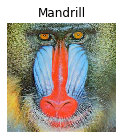

Height - 300, Width - 300 and Number of channels - 3


In [31]:
image1 = load('images/mandrill.jpg')

display(image1, 'Mandrill')

print_stats(image1)

Return to this question after reading through the rest of the assignment. Find 2 more images to use as test cases in this assignment and display them below. Use your print_stats() function to display their height, width and number of channels. Explain *why* you have chosen each image.

In [ ]:
### Your code to load and display your images here

*Replace with explanation of images*

# Question 2: Image processing (20%)

Now that you have an image stored as a numpy array, let's try some operations on it.

1. Implement the `crop()` function in a1code.py. Use array slicing to crop the image.
2. Implement the `resize()` function in a1code.py.
3. Implement the `increase_contrast()` function in a1code.py.
4. Implement the `greyscale()` function in a1code.py.
5. Implement the `binary()` function in a1code.py.

Is the contrast function always reversible? Explain why or why not.

In [64]:
display(resize(image1, 200, 400 ))

TypeError: 'int' object is not subscriptable

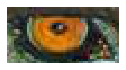

TypeError: Image data of dtype object cannot be converted to float

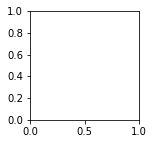

In [58]:
# Crop the eye
display(crop(image1, 25, 80, 25, 50))

display(resize(image1, 200, 400 ))

display(change_contrast(image1, 0.5))
display(change_contrast(image1, 1.5))

display(greyscale(image1))

## Question 3: Convolution (20%)

### 3.1 2D convolution

Recall that a convolution between a 2D filter kernel $h$ and an image $f$ is defined as 

$f:\mathbb{R}^2\rightarrow \mathbb{R}$ and a kernel $h:\mathbb{R}^2\rightarrow\mathbb{R}$ is defined as follows:
$$(f*h)[m,n]=\sum_{i=-\infty}^\infty\sum_{j=-\infty}^\infty f[i,j]\cdot h[m-i,n-j]$$

Implement the convolution operation in the function `conv2D()` in a1code.py.

Here is some code to test it on a test image:

Explain how you have handled images with multiple colour channels (e.g. RGB).


In [ ]:
test_conv2D()

### 3.2 RGB convolution

In the function `conv` in a1code.py, extend your function `conv2D` to work on RGB images, by applying the 2D convolution to each channel independently. 

In [ ]:
# Add your code here and test your conv on the given RGB image using the box kernel.

### 3.3 Gaussian filter convolution

Use the `gauss2D` function provided in a1code.py to create a Gaussian kernel, and apply it to your images with convolution. You will obtain marks for trying different tests and analysing the results, for example:
- try varying the image size, and the size and variance of the filter  
- subtract the filtered image from the original - this gives you an idea of what information is lost when filtering

What do you observe and why?

### 3.4 Sobel filters

Define a horizontal and vertical Sobel edge filter kernel and test them on your images. You will obtain marks for testing them and displaying results in interesting ways, for example:
- apply them to an image at different scales
- considering how to display positive and negative gradients
- apply different combinations of horizontal and vertical filters

In [ ]:
# Your code to answer 3.3 and displaay results here.

Your comments on the results here...

In [ ]:
# Your code to answer 3.4 and displaay results here.

Your comments on results here...

## Question 4: Image sampling and pyramids (25%)

### 4.1 Image Sampling

Apply your `resize()` function to reduce an image to 0.125 height and width, and then to enlarge the image back to its original size. Display the result and compare to the original image. Apply a Sobel filter to the output image and compare to the original result.

### 4.2 Image Pyramids 

Creat a Gaussian pyramid as described in week2's lecture on an image.

Apply a Gaussian kernel to an image I, and resize it with ratio 0.5, to get $I_1$. Repeat this step to get $I_2$, $I_3$ and $I_4$.

Display these four images following the zebra example shown in the lecture note.

What is your observation?

Do these Gaussian kernels work differently at different scales? Explain your results.

In [ ]:
image1 = load('images/mandrill.jpg')
display(image1)
i2 = resize(resize(image1, 30, 30), 300, 300)
display(i2)
display(image1-i2)
display(resize(conv(image1, gf), 30, 30))

## Question 5: Auto correlation (20%)

Recall (lecture 2) that cross-correlation of an image $f$ with a template $g$ is defined as follows:
$$(g ** f)[m,n]=\sum_{i=-\infty}^\infty\sum_{j=-\infty}^\infty g[i,j]\cdot f[m + i,n + j]$$

Correlation is a measure of similarity between the template and an image. It is defined similarly to convolution.

### 5.1 Correlation function

Implement the function `corr()` in a1code.py. Please reuse your convolution function. Hint: numpy's `flip()` function may be useful here.

### 5.2 Auto-correlation

We will experiment with *auto-correlation*, where the template patch is taken from the image it is being compared to. Use the cropped eye from 2.1 as your template. Calculate the correlation of that template with every location in the image, and display the output. Where is the maximum similarity? Is it what you expect? (Hint: numpy functions `argmax()` and `unravel()` will be useful here). For simplicity, you can use a greyscale version of the image and template.

Is it what you expect? Why or why not?


### 5.3 Auto-correlation with modified image

Try modifying your correlation template or the base image in different ways, and analyse the effect on correlation results. For example:

- if you did not find the correct location in 5.2, try centering the template about its mean (i.e. subtracting the mean brightness from each pixel)
- if you did find the correct location in 5.2, try using `resize()` and `change_contrast()` on the image. Where does it fail?

As before you will obtain marks for coming up with interesting tests and analysis, and displaying your results clearly. 

Hints: Do not forget the conduct experiments on your own images.

In [ ]:
# Your code and experiments here

Explain what you have done and why. How could correlation be improved to improve its robustness to scale and or brightness changes?

% Explain and answers to the above questions


# Question 6: Normalised cross correlation (postgraduate, 10%)

*This question is required for postgraduate students only. PG marks for the other questions will be scaled by 0.9.*

Search online for "normalized cross correlation" (NCC). Implement and test by comparing to your previous correlation results. 